In [1]:
import sys
sys.executable

'C:\\Users\\13479\\Anaconda3\\python.exe'

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt # for plottingn
import seaborn as sns 
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [3]:
from mlxtend.preprocessing import TransactionEncoder

In [3]:
os.getcwd()

'C:\\Users\\13479'

In [4]:
os.chdir(r"C:\Users\13479\Desktop\dataset")

In [5]:
df = pd.read_csv('test.csv')

In [6]:
cols = ['MB006','MB005','MB002','MB001','AP007','AP006','AP004','AP003','AP002','AP001','bad30']


In [7]:
personal_data = df[[col for col in cols]]

In [8]:
personal_data.columns = ['Mobile','Year_Phone','Cnt_CHCR','Contact',
                         'City','OS','Loan_term','Education','Gender','Age','Default']
personal_data.head()

,Mobile,Year_Phone,Cnt_CHCR,Contact,City,OS,Loan_term,Education,Gender,Age,Default
0,APPLE,5.0,0,763,1,ios,12,4.0,1,29,0.0
1,VIVO,2.0,0,4,1,android,12,3.0,2,24,1.0
2,APPLE,5.0,0,646,1,ios,12,3.0,1,32,0.0
3,APPLE,12.0,0,45,1,ios,12,1.0,1,43,0.0
4,APPLE,5.0,1,54,1,ios,6,1.0,1,24,0.0


In [9]:
def convertDataToRange(data,col,span):
    column = []
    for index,rows in data.iterrows():
        i = data.loc[index,col]
        temp = int(i/span)*span
        val = '(',col,':',str(temp),'-',str(temp+span),')'
        
        column.append("".join(val))
    return column 

In [10]:
personal_data.head(40)

,Mobile,Year_Phone,Cnt_CHCR,Contact,City,OS,Loan_term,Education,Gender,Age,Default
0,APPLE,5.0,0,763,1,ios,12,4.0,1,29,0.0
1,VIVO,2.0,0,4,1,android,12,3.0,2,24,1.0
2,APPLE,5.0,0,646,1,ios,12,3.0,1,32,0.0
3,APPLE,12.0,0,45,1,ios,12,1.0,1,43,0.0
4,APPLE,5.0,1,54,1,ios,6,1.0,1,24,0.0
5,APPLE,8.0,0,479,1,ios,12,0.0,2,45,0.0
6,VIVO,3.0,0,98,1,android,6,1.0,2,30,1.0
7,APPLE,4.0,0,820,1,ios,12,3.0,1,31,0.0
8,APPLE,7.0,0,295,1,ios,12,1.0,1,27,0.0
9,APPLE,11.0,0,24,1,ios,12,4.0,2,32,0.0


In [11]:
personal_data.describe()

,Year_Phone,Cnt_CHCR,Contact,City,Loan_term,Education,Gender,Age,Default
count,79939.000000,79939.000000,79939.000000,79939.000000,79939.000000,79939.000000,79939.000000,79939.000000,79939.000000
mean,6.310662,0.202204,311.009307,3.315178,10.478965,1.573637,1.348578,31.003540,0.190545
std,3.836032,0.685572,851.999399,1.351746,3.025167,1.178428,0.476523,7.251129,0.392734
min,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1.000000,20.000000,0.000000
25%,4.000000,0.000000,53.000000,2.000000,12.000000,1.000000,1.000000,26.000000,0.000000
50%,6.000000,0.000000,155.000000,3.000000,12.000000,1.000000,1.000000,29.000000,0.000000
75%,9.000000,0.000000,341.000000,5.000000,12.000000,3.000000,2.000000,35.000000,0.000000
max,48.000000,79.000000,69665.000000,5.000000,12.000000,6.000000,2.000000,55.000000,1.000000


In [12]:
personal_data['Year_Phone']  = convertDataToRange(personal_data,'Year_Phone',2)
personal_data['Contact']  = convertDataToRange(personal_data,'Contact',50)
personal_data['Age']  = convertDataToRange(personal_data,'Age',10)
personal_data['Education']  = convertDataToRange(personal_data,'Education',1)
personal_data['Loan_term']  = convertDataToRange(personal_data,'Loan_term',3)

C:\Users\13479\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\13479\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\13479\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [13]:
data = personal_data.drop('Cnt_CHCR', axis = 1)
data.loc[data['Gender'] ==1, 'Gender'] = 'Male'
data.loc[data['Gender'] ==2, 'Gender'] = 'Female'

In [14]:
data.head()

,Mobile,Year_Phone,Contact,City,OS,Loan_term,Education,Gender,Age,Default
0,APPLE,(Year_Phone:4-6),(Contact:750-800),1,ios,(Loan_term:12-15),(Education:4-5),Male,(Age:20-30),0.0
1,VIVO,(Year_Phone:2-4),(Contact:0-50),1,android,(Loan_term:12-15),(Education:3-4),Female,(Age:20-30),1.0
2,APPLE,(Year_Phone:4-6),(Contact:600-650),1,ios,(Loan_term:12-15),(Education:3-4),Male,(Age:30-40),0.0
3,APPLE,(Year_Phone:12-14),(Contact:0-50),1,ios,(Loan_term:12-15),(Education:1-2),Male,(Age:40-50),0.0
4,APPLE,(Year_Phone:4-6),(Contact:50-100),1,ios,(Loan_term:6-9),(Education:1-2),Male,(Age:20-30),0.0


In [16]:
def makeSelectiveDefaultDataset(fromData,default,colList):
    toData = fromData[fromData['Default'] == default]
    toData =toData[colList]
    return(toData)

In [17]:
def applyApriori(dataset,support):
    rec = dataset.values.tolist()
    # Finding Frequent Item Sets

    te = TransactionEncoder()
    te_ary = te.fit(rec).transform(rec)
    df = pd.DataFrame(te_ary, columns=te.columns_)
    
    freq_Itemsets =  apriori(df,min_support = support, use_colnames = True)
    freq_Itemsets['length'] = freq_Itemsets['itemsets'].apply(lambda x:len(x))
    return(freq_Itemsets[freq_Itemsets['length'] > 1])

In [30]:
Def = makeSelectiveDefaultDataset(data,1,['Age','Year_Phone','OS', 'Gender','Loan_term','Education'])

freq_Itemsets_Def = applyApriori(Def,0.1)
print("Default Data")
freq_Itemsets_Def.sort_values(by=['support'], ascending=False).drop('length', axis =1).head(10)

Default Data


,support,itemsets
32,0.596179,"((Education:1-2), (Loan_term:12-15))"
47,0.549173,"(Male, (Loan_term:12-15))"
17,0.440980,"((Age:20-30), (Loan_term:12-15))"
48,0.430804,"(android, (Loan_term:12-15))"
37,0.413209,"(Male, (Education:1-2))"
86,0.360163,"(Male, (Loan_term:12-15), (Education:1-2))"
46,0.347230,"(Female, (Loan_term:12-15))"
15,0.345457,"((Age:20-30), (Education:1-2))"
50,0.335806,"((Loan_term:12-15), ios)"
22,0.322085,"((Age:20-30), Male)"


In [19]:
rec = Def.values.tolist()
    # Finding Frequent Item Sets

te = TransactionEncoder()
te_ary = te.fit(rec).transform(rec)
df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

In [20]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,((Age:20-30)),((Education:1-2)),0.501182,0.669380,0.345457,0.689285,1.029736,0.009976,1.064060
1,((Education:1-2)),((Age:20-30)),0.669380,0.501182,0.345457,0.516085,1.029736,0.009976,1.030797
2,((Age:20-30)),((Education:3-4)),0.501182,0.171087,0.120339,0.240110,1.403437,0.034593,1.090833
3,((Education:3-4)),((Age:20-30)),0.171087,0.501182,0.120339,0.703377,1.403437,0.034593,1.681656
4,((Age:20-30)),((Education:4-5)),0.501182,0.060399,0.035320,0.070474,1.166808,0.005049,1.010839
5,((Education:4-5)),((Age:20-30)),0.060399,0.501182,0.035320,0.584783,1.166808,0.005049,1.201342
6,((Age:20-30)),((Loan_term:3-6)),0.501182,0.021928,0.013787,0.027509,1.254520,0.002797,1.005739
7,((Loan_term:3-6)),((Age:20-30)),0.021928,0.501182,0.013787,0.628743,1.254520,0.002797,1.343591
8,((Age:20-30)),((Loan_term:6-9)),0.501182,0.045365,0.024816,0.049515,1.091487,0.002080,1.004367
9,((Loan_term:6-9)),((Age:20-30)),0.045365,0.501182,0.024816,0.547033,1.091487,0.002080,1.101225


In [31]:
rules[( (rules['lift'] >= 1) &
       rules['confidence'] >= 0.5 )].sort_values(by=['leverage'], ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
48,((Education:0-1)),((Age:40-50)),0.098346,0.132812,0.073464,0.746996,5.624440,0.060402,3.427564
49,((Age:40-50)),((Education:0-1)),0.132812,0.098346,0.073464,0.553139,5.624440,0.060402,2.017751
795,((Age:40-50)),"((Loan_term:12-15), (Education:0-1))",0.132812,0.088695,0.066111,0.497776,5.612226,0.054331,1.814538
790,"((Loan_term:12-15), (Education:0-1))",((Age:40-50)),0.088695,0.132812,0.066111,0.745374,5.612226,0.054331,3.405728
791,"((Loan_term:12-15), (Age:40-50))",((Education:0-1)),0.122965,0.098346,0.066111,0.537640,5.466846,0.054018,1.950114
794,((Education:0-1)),"((Loan_term:12-15), (Age:40-50))",0.098346,0.122965,0.066111,0.672230,5.466846,0.054018,2.675761
830,((Education:0-1)),"(android, (Age:40-50))",0.098346,0.092240,0.058495,0.594793,6.448319,0.049424,2.240238
827,"(android, (Age:40-50))",((Education:0-1)),0.092240,0.098346,0.058495,0.634164,6.448319,0.049424,2.464639
826,"(android, (Education:0-1))",((Age:40-50)),0.076812,0.132812,0.058495,0.761538,5.733937,0.048294,3.636593
831,((Age:40-50)),"(android, (Education:0-1))",0.132812,0.076812,0.058495,0.440435,5.733937,0.048294,1.649832


In [35]:
personal_data2 = df[[col for col in cols]]
personal_data2.columns = ['Mobile','Year_Phone','Cnt_CHCR','Contact',
                         'City','OS','Loan_term','Education','Gender','Age','Default']

In [37]:
personal_data2.loc[personal_data2.Default == 1, 'STATUS'] = 'DEFAULT'
personal_data2.loc[personal_data2.Default == 0, 'STATUS'] = 'PAID'

C:\Users\13479\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\13479\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [38]:
personal_data2.head()

,Mobile,Year_Phone,Cnt_CHCR,Contact,City,OS,Loan_term,Education,Gender,Age,Default,STATUS
0,APPLE,5.0,0,763,1,ios,12,4.0,1,29,0.0,PAID
1,VIVO,2.0,0,4,1,android,12,3.0,2,24,1.0,DEFAULT
2,APPLE,5.0,0,646,1,ios,12,3.0,1,32,0.0,PAID
3,APPLE,12.0,0,45,1,ios,12,1.0,1,43,0.0,PAID
4,APPLE,5.0,1,54,1,ios,6,1.0,1,24,0.0,PAID


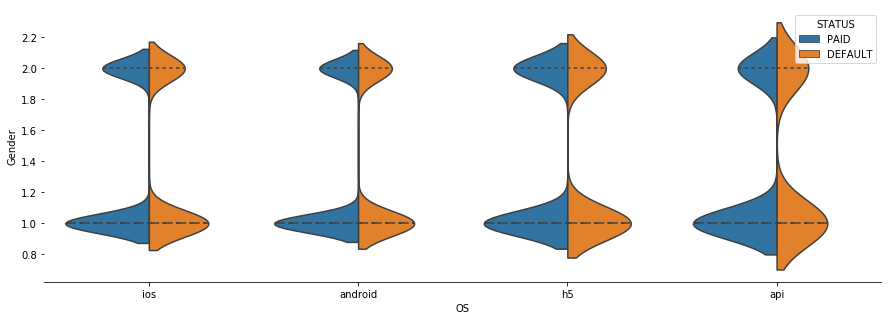

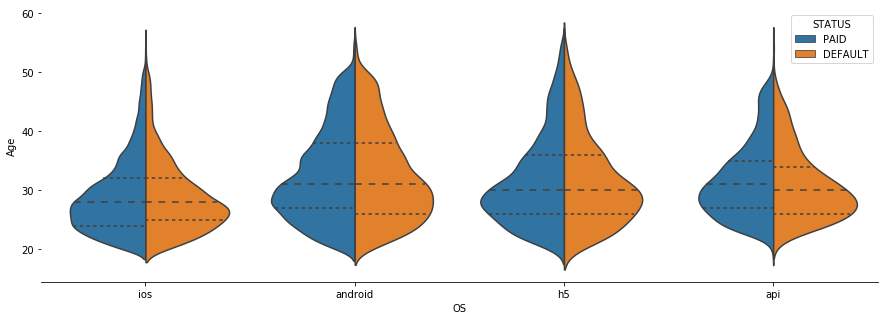

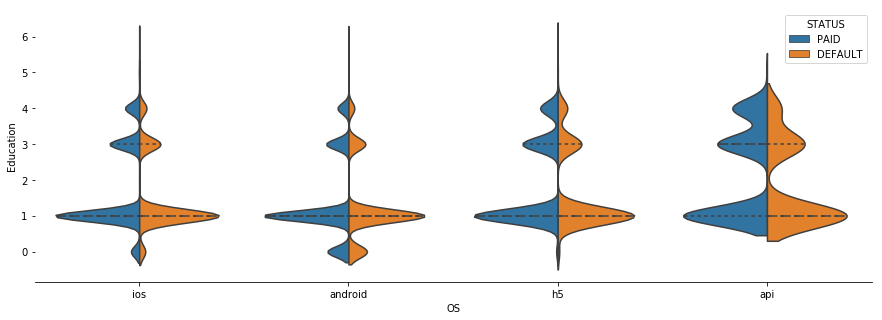

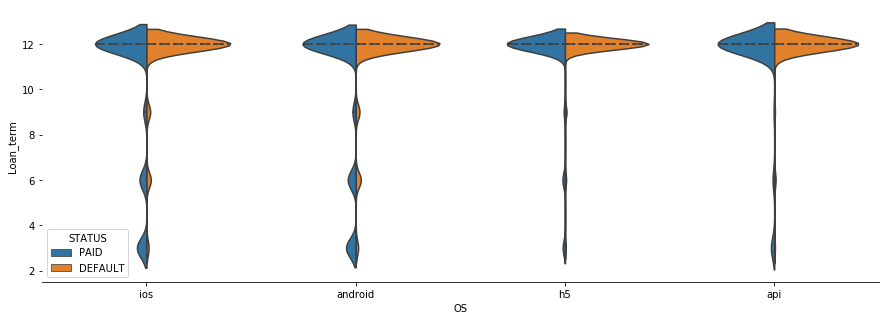

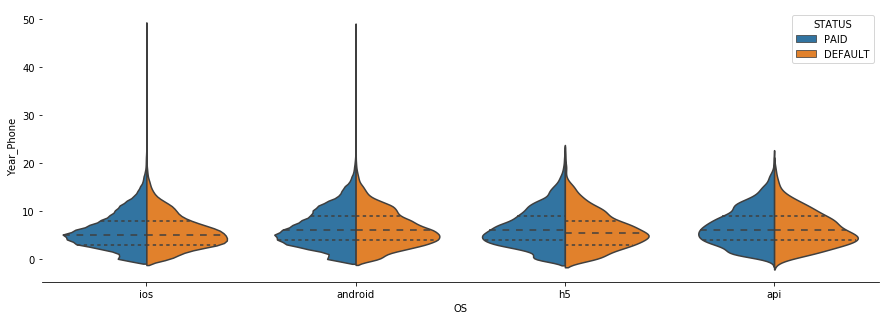

In [46]:
cols=['Gender', 'Age', 'Education', 'Loan_term','Year_Phone']

for col in cols:
    
    plt.figure(figsize=(15,5))

    sns.violinplot(x='OS', y=col, hue='STATUS',
                   split=True, inner="quart",  palette={'PAID': 'C0', 'DEFAULT':'C1'},
                   data=personal_data2)
    
    sns.despine(left=True)

In [ ]:
plt.figure(figsize=(15,5))
sns.violinplot(x='Mobile', y=col, hue='STATUS',
                   split=True, inner="quart",  palette={'Default': 0, 'Default':'1'},
                   data=df)
sns.despine(left=True)

In [4]:
df.columns[df.isnull().mean() > 0.5]

Index(['PA022', 'PA023', 'PA024', 'PA025', 'PA026', 'PA027', 'PA028', 'PA029',
       'PA030', 'PA031', 'PA032', 'PA033', 'PA034', 'PA035', 'PA036'],
      dtype='object')

In [9]:
df.fillna(0)

,Unnamed: 0,AP004,AP002,AP006,AP001,AP005,AP003,MB001,MB002,MB003,...,ym2945,ym2956,ym2957,ym2984,ym2985,ym2994,ym2995,ym3000,ym3001,bad30
0,0,12,1,ios,29,2018-04-26 14:36:49,4.0,763,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,12,2,android,24,2018-04-23 11:07:58,3.0,4,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,12,1,ios,32,2018-04-15 16:09:10,3.0,646,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,12,1,ios,43,2018-05-25 14:48:19,1.0,45,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,6,1,ios,24,2018-05-02 08:49:41,1.0,54,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79934,79934,12,1,ios,42,2018-05-21 18:41:46,1.0,269,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79935,79935,12,2,android,29,2018-05-22 16:50:44,1.0,73,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79936,79936,12,2,android,28,2018-04-10 14:02:57,3.0,5,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79937,79937,12,1,android,26,2018-05-04 13:03:15,1.0,262,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0


In [6]:
def remove_zeros(dataframe):    
    zeros = []
    for i in range(0,dataframe.shape[1]):
            count = 0
            for x in range(0, dataframe.shape[0]):
                if (dataframe.iloc[x, i] == 0).all():
                    count += 1
            if count > dataframe.shape[0]/2:
                zeros.append(i)
    return zeros

In [7]:
def remove_zeros_row(dataframe):    
    zeros = []
    for i in range(0,dataframe.shape[0]):
            count = 0
            for x in range(0, dataframe.shape[1]):
                if (dataframe.iloc[i, x] == 0).all():
                    count += 1
            if count > dataframe.shape[1]/4:
                zeros.append(i)
    return zeros

In [8]:
data = df.drop(["AP005",'AP006','MB006'], axis=1)
l = remove_zeros(data)

In [10]:
len(l)

1348

In [11]:
dataframe = data.drop(data.columns[l[:-1]], axis=1)

In [64]:
len(r)

15936

In [12]:
r1 = remove_zeros_row(dataframe)
len(r1)

3994

In [13]:
dataframe  = dataframe.drop(r1)

In [14]:
dataframe.shape[0]

15989

In [59]:
dataframe.dropna(thresh=(dataframe.shape[1]*0.95))

,Unnamed: 0,AP004,AP002,AP001,AP003,MB001,MB003,MB004,CR004,CR005,...,ym2290,ym2301,ym2302,ym2323,ym2324,ym2329,ym2330,ym2331,ym2332,ym2333
0,0,12,1,29,4.0,763,1,1,4.0,4.0,...,4.0,6.0,1.0,0.0,0.0,0.6103,0.6592,0.7608,0.5681,0.8916
1,1,12,2,24,3.0,4,1,0,3.0,1.0,...,4.0,21.0,1.0,20.0,4.0,0.5341,0.6495,0.6688,0.5145,0.8563
2,2,12,1,32,3.0,646,1,1,3.0,3.0,...,2.0,14.0,1.0,0.0,0.0,0.5176,0.6930,0.7885,0.5367,0.9566
3,3,12,1,43,1.0,45,1,1,4.0,4.0,...,6.0,8.0,5.0,6.0,2.0,0.5549,0.6062,0.6816,0.4227,0.7816
4,4,6,1,24,1.0,54,1,1,1.0,1.0,...,4.0,0.0,0.0,0.0,0.0,0.6565,0.6787,0.5357,0.6533,0.7768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79934,79934,12,1,42,1.0,269,1,1,1.0,1.0,...,10.0,0.0,0.0,0.0,0.0,0.5070,0.5932,0.5591,0.4977,0.7047
79935,79935,12,2,29,1.0,73,1,1,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.5839,0.5839,0.4070,0.6980,0.6281
79936,79936,12,2,28,3.0,5,1,1,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.5171,0.6838,0.8699,0.5150,1.0000
79937,79937,12,1,26,1.0,262,1,1,2.0,1.0,...,12.0,1.0,1.0,0.0,0.0,0.4775,0.5612,0.5746,0.4997,0.7057


In [82]:
dataframe=dataframe.fillna(0)

In [15]:
dataframe.to_csv(r'C:\Users\13479\Desktop\dataset\rmNA_test.csv')

In [47]:
dataframe.columns[dataframe.isnull().mean() > 0]

Index(['CR021', 'PA022', 'PA023', 'PA024', 'PA025', 'PA026', 'PA027', 'PA028',
       'PA029', 'PA030',
       ...
       'CD167', 'CD169', 'CD170', 'CD172', 'CD173', 'CD174', 'CD175', 'CD176',
       'CD177', 'CD178'],
      dtype='object', length=142)

In [37]:
len(dataframe)

79939

In [39]:
dataframe.shape[1]

459